# Task 2.1 Stochastic Gradient Descent  
___
## Step 1: Implementation


In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
class GradientDescent:    

    def __init__(self, coefficients = [2,-3,5,3], weights = [1,1,1,1], seed = 42) -> None:
        self.WEIGHTS = weights
        self.POLY_COEFICIENTS = coefficients
        self.SEED = seed
        np.random.seed(self.SEED)

    def y_predicted(self, x: np.ndarray):
        return self.WEIGHTS[0]*x**3 + self.WEIGHTS[1]*x**2 + self.WEIGHTS[2]*x + self.WEIGHTS[3]
        
    def y_actual(self, x: np.ndarray):
        return np.polyval(self.POLY_COEFICIENTS, x)

    def w_derivative(self, x: np.ndarray, order: int):
        n = len(x)
        sum = ((x ** order) * (self.y_actual(x) - self.y_predicted(x))).sum()
        result = (-2/n) * sum
        return result

    def train_mini_batch(self, epochs = 50000, learning_rate = 0.001, range_ = (-1,1), batch_size = 10):
        for _ in range(epochs):
            mini_batch = np.random.uniform(range_[0], range_[1], batch_size)

            for i in range(len(self.WEIGHTS)):
                self.WEIGHTS[i] = self.WEIGHTS[i] - learning_rate * self.w_derivative(mini_batch, len(self.WEIGHTS) - i - 1)

        weights = self.WEIGHTS.copy()
        self.WEIGHTS = [1,1,1,1]
        return weights

    def train_stochastic(self, epochs = 50000, learning_rate = 0.001, range_ = (-1,1)):
        for _ in range(epochs):
            random_x = np.array([np.random.uniform(range_[0], range_[1])])

            for i in range(len(self.WEIGHTS)):
                self.WEIGHTS[i] = self.WEIGHTS[i] - learning_rate * self.w_derivative(random_x, len(self.WEIGHTS) - i - 1)

        weights = self.WEIGHTS.copy()
        self.WEIGHTS = [1,1,1,1]
        return weights
    
    def train_batch(self, epochs = 50000, learning_rate = 0.001, range_ = (-1,1), batch_size = 10000):
        batch = np.random.uniform(range_[0], range_[1], batch_size)

        for _ in range(epochs):
            for i in range(len(self.WEIGHTS)):
                self.WEIGHTS[i] = self.WEIGHTS[i] - learning_rate * self.w_derivative(batch, len(self.WEIGHTS) - i - 1)

        weights = self.WEIGHTS.copy()
        self.WEIGHTS = [1,1,1,1]
        return weights


## Step 2: Performance Testing

In [39]:
def mean_squaredd_error(y_actual: np.ndarray, y_predicted: np.ndarray):
    return ((y_actual - y_predicted) ** 2).mean()

def data_generation(actual_coefficients, predicted_coefficients, seed = 42, range_ = (-1,1), sample_size = 1000) -> tuple:
    np.random.seed(seed)
    x = np.random.uniform(range_[0], range_[1], sample_size)
    y_actual = np.polyval(actual_coefficients, x)
    y_predicted = np.polyval(predicted_coefficients, x)

    return y_actual, y_predicted

coefficients = [2,-3,5,3]
weights = [1,1,1,1]

gd = GradientDescent(coefficients, weights)
weights_mini_batch = gd.train_mini_batch()
print("weights_mini_batch: DONE")

weights_stochastic = gd.train_stochastic()
print("weights_stochastic: DONE")

weights_batch = gd.train_batch()
print("weights_batch: DONE")

y_actual_mini_batch, y_predicted_mini_batch = data_generation(coefficients, weights_mini_batch)
y_actual_stochastic, y_predicted_stochastic = data_generation(coefficients, weights_stochastic)
y_actual_batch, y_predicted_batch = data_generation(coefficients, weights_batch)
print("Data generation: DONE")
print()

MSE_mini_batch = mean_squaredd_error(y_actual_mini_batch, y_predicted_mini_batch)
MSE_stochastic = mean_squaredd_error(y_actual_stochastic, y_predicted_stochastic)
MSE_batch = mean_squaredd_error(y_actual_batch, y_predicted_batch)

print(f'MSE mini batch: {MSE_mini_batch}')
print(f'MSE stochastic: {MSE_stochastic}')
print(f'MSE batch: {MSE_batch}')
    

weights_mini_batch: DONE
weights_stochastic: DONE
weights_batch: DONE
Data generation: DONE

MSE mini batch: 0.0009657747995010156
MSE stochastic: 0.000979424597382571
MSE batch: 0.0010303456922722215


## Step 3: Plotting the regressions

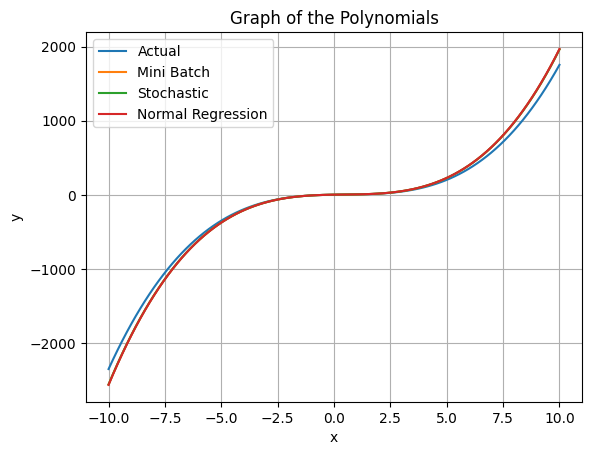

In [44]:
x = np.linspace(-10, 10, 100)
y1 = np.polyval(coefficients, x)
y2 = np.polyval(weights_mini_batch, x)
y3 = np.polyval(weights_stochastic, x)
y4 = np.polyval(weights_batch, x)

plt.plot(x, y1, label="Actual")
plt.plot(x, y2, label="Mini Batch")
plt.plot(x, y3, label="Stochastic")
plt.plot(x, y4, label="Normal Regression")

# plot
plt.xlabel("x")
plt.ylabel("y")
plt.title("Graph of the Polynomials")
plt.grid(True)

plt.legend()  


### NOTE:
Las graficas de las regresiones son tan similares que la regresion normal está por encima de todas las demas y por lo tanto __parece__ solo estar esa.

## Step 4: Result analisis  
De los 3 métodos la implementación con mini batches fue de las más rápidas y de las más eficientes también. La implementación con mini batches cuenta con un MSE de __0.000979424597382571__ que es casi nada. La razón de esto es que tiene actualizaciones más eficientes; al actualizar los pesos en función de lotes más pequeños, el minibatch evita cálculos innecesarios de derivadas con todo el conjunto de datos, lo que potencialmente mejora la velocidad en comparación con el método de lote completo. Asimismo, el uso de múltiples puntos de datos en un minibatch puede promediar algo de ruido en comparación con las actualizaciones de un solo punto, lo que potencialmente conduce a una convergencia más fluida y una mejor generalización.